
*   Name: Aishwarya Bhavsar
*   CSULB ID: 029371509
*   Binary Classification - IMDB Dataset.

In [21]:
from keras.datasets import imdb
from pprint import pprint


In [22]:
#Only keep the top 10,000 most frequently occurring words in the training data.
#train_data & test_data are list of reviews, each review consist of indices.
#train_labels & test_labels are the lists containing 0's and 1's - 0 stands for negative, 1 stand for positive.
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)


In [23]:
train_data[0]


[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [24]:

train_labels[0]


1

In [25]:
#we have kept the word limit to 10000. Hence, no word index will exceed 10000
max([max(sequence) for sequence in train_data])



9999

In [26]:
#Convert this categorical data into numeric form in order to feed into the neural network using one hot encoding. 
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))          #creates a matrix with all zeroes.
  for i, sequence in enumerate(sequences):                 #sets specific indices to 1
    results[i,sequence] = 1
  return results  



In [27]:
x_train = vectorize_sequences(train_data)                  #vectorized training data
x_test = vectorize_sequences(test_data)                    #vectorized test data

In [28]:

x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [29]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
y_train.shape

(25000, 10)

In [30]:
#from keras import relu
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(10,activation='relu', input_shape=(10000,)))
model.add(layers.Dense(10,activation='relu'))
model.add(layers.Dense(10,activation='sigmoid'))

In [31]:
#Compiling the model.
model.compile(optimizer='rmsprop',loss='binary_crossentropy', metrics=['accuracy'])

In [32]:
#Configuring the optimizer.
from tensorflow.keras import optimizers
#from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [33]:
#Using custom losses and metrics
from keras import losses
from keras import metrics
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),loss=losses.binary_crossentropy,metrics=[metrics.binary_accuracy])

In [34]:
#Setting a validation set
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]



In [35]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
#model.build(input_shape)
model.summary()
history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val, y_val))
#history = model.fit(x_val, y_val)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                100010    
                                                                 
 dense_4 (Dense)             (None, 10)                110       
                                                                 
 dense_5 (Dense)             (None, 10)                110       
                                                                 
Total params: 100,230
Trainable params: 100,230
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
30/30 [==============================] - 2s 53ms/step - loss: 0.6067 - acc: 2.6667e-04 - val_loss: 0.5497 - val_acc: 0.0000e+00
Epoch 2/20
30/30 [==============================] - 1s 45ms/step - loss: 0.5135 - acc: 0.0012 - val_loss: 0.4788 - val_acc: 0.0165
Epoch 3/20
30/30 [========================

In [36]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

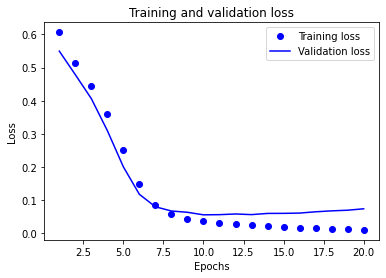

In [42]:

#Plotting Training and Validation Loss
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')           
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')      
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


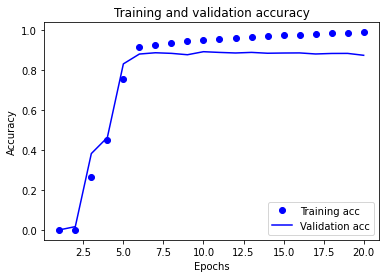

In [43]:
#Plotting training and validation accuracy.
plt.clf()                                      
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


*   Retraining a model from scratch in order to prevent overfitting




In [44]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(10, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(10, activation='sigmoid'))

model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 4s 37ms/step - loss: 0.4818 - accuracy: 0.4925
Epoch 2/4
49/49 [==============================] - 2s 35ms/step - loss: 0.3418 - accuracy: 0.5000
Epoch 3/4
49/49 [==============================] - 2s 32ms/step - loss: 0.2415 - accuracy: 0.5000
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.1256 - accuracy: 0.7716


In [45]:
#This fairly naive approach fetches 77% of the accuracy
results

[0.12557758390903473, 0.7716000080108643]

In [46]:
model.predict(x_test)

array([[3.0367315e-01, 5.6914896e-01, 5.6336045e-02, ..., 5.0658494e-02,
        8.9538097e-04, 1.8414646e-02],
       [9.6171498e-02, 9.9278820e-01, 7.6069744e-05, ..., 2.9242039e-04,
        1.5716360e-09, 9.9885518e-05],
       [4.4883755e-01, 7.8866458e-01, 4.9504638e-04, ..., 5.6403875e-04,
        1.2096359e-07, 4.9808621e-04],
       ...,
       [3.1917661e-01, 4.2209223e-01, 6.4839303e-02, ..., 4.9418062e-02,
        9.6520782e-04, 1.4400810e-02],
       [3.3798820e-01, 4.0286648e-01, 5.5315673e-02, ..., 3.9797127e-02,
        6.5594912e-04, 1.4715493e-02],
       [2.7307644e-01, 6.2367332e-01, 1.0471761e-02, ..., 8.5924864e-03,
        1.8249235e-05, 2.8581917e-03]], dtype=float32)